<a href="https://colab.research.google.com/github/manoj987654/datascience/blob/main/IrisClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
data.shape

(150, 6)

In [ ]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
data.drop(labels=['Id'],axis=1,inplace=True)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data['Species'].value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [ ]:
classes = data['Species']
data.drop(labels=['Species'],axis=1,inplace=True)


In [ ]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
cov = data.corr()

<Axes: >

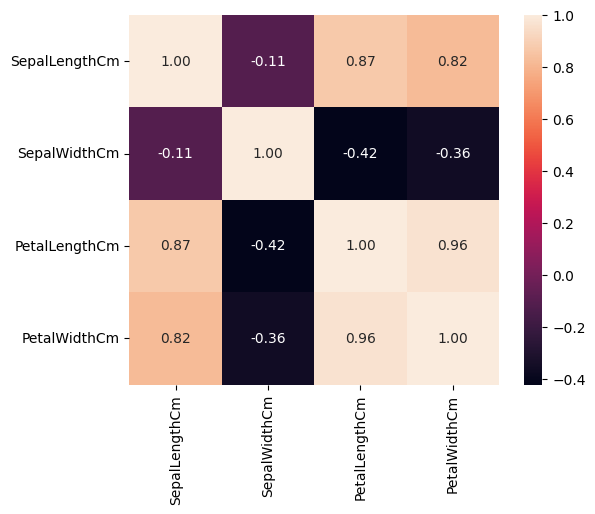

In [ ]:
sns.heatmap(cov,annot=True,fmt='.2f',square=True)

In [ ]:
temp_df = data.copy()
temp_df.astype(dtype='int64')
temp_df['Species'] = classes

In [ ]:
temp_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

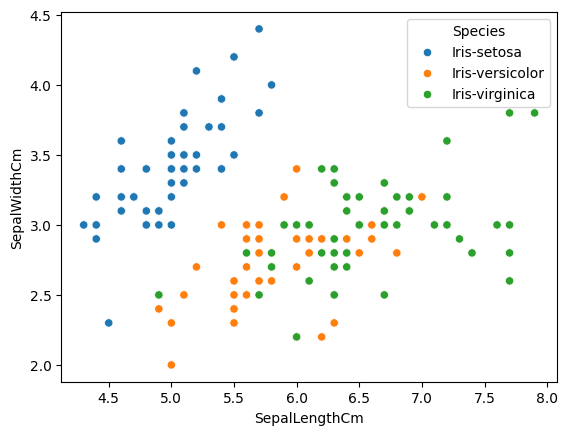

In [ ]:
sns.scatterplot(x=temp_df['SepalLengthCm'],y=temp_df['SepalWidthCm'],hue=temp_df['Species'])

<Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

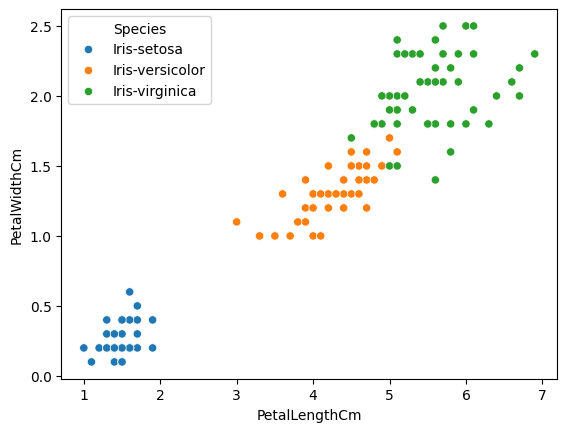

In [ ]:
sns.scatterplot(x=temp_df['PetalLengthCm'],y=temp_df['PetalWidthCm'],hue=temp_df['Species'])

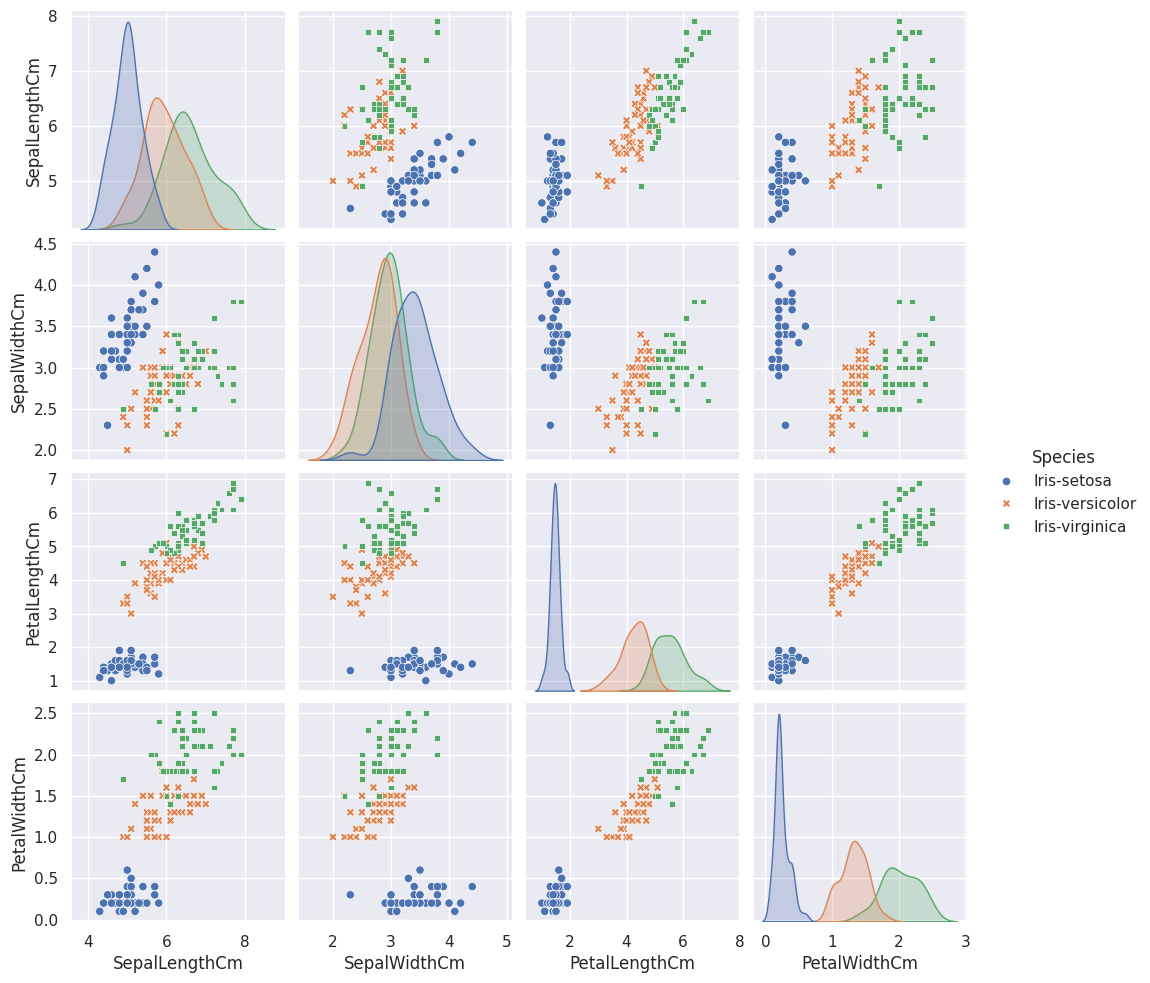

In [ ]:
sns.set(rc={"figure.figsize": (16, 16)})
sns.pairplot(temp_df,hue='Species',kind='scatter',markers=True)

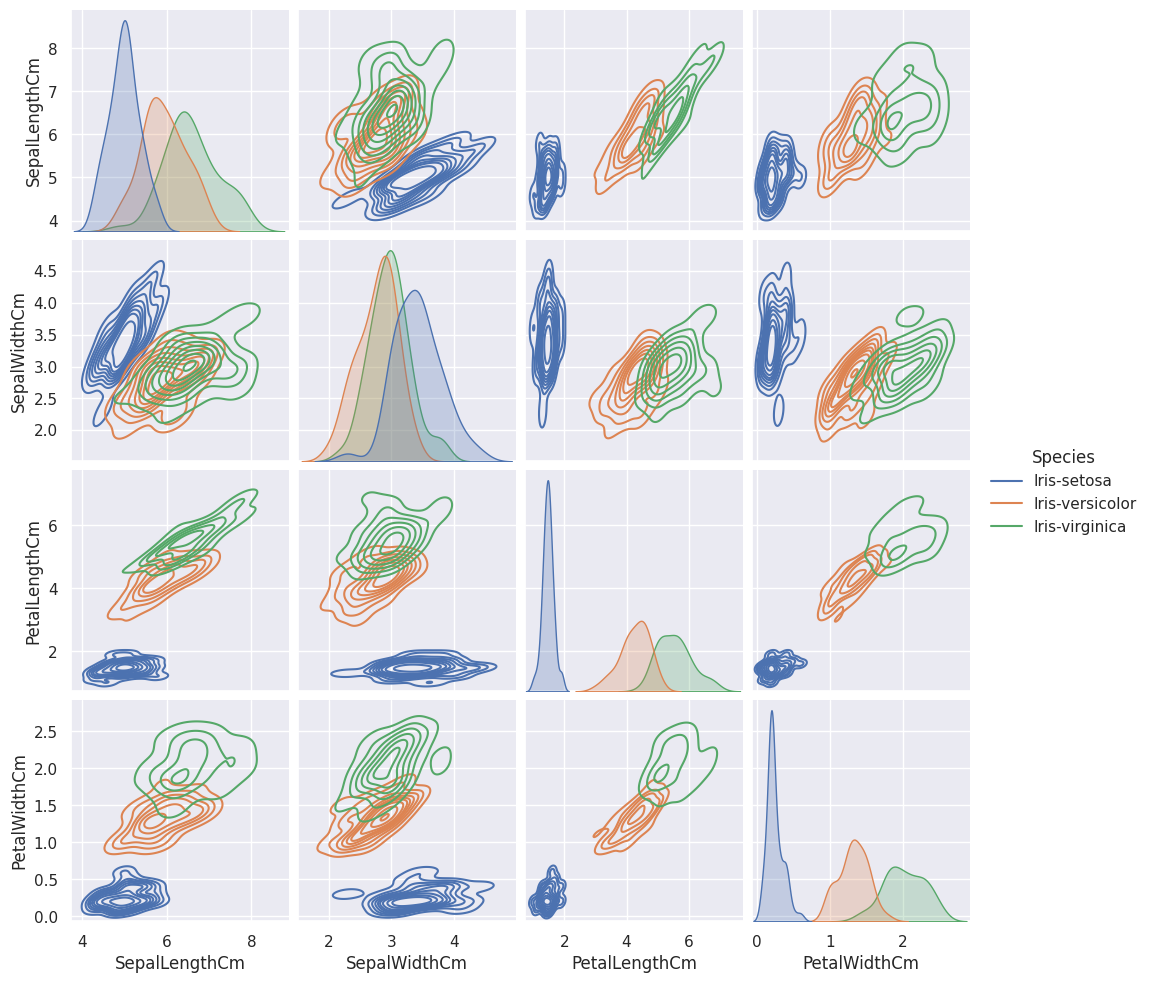

In [ ]:
sns.set(rc={"figure.figsize": (16, 16)})
sns.pairplot(temp_df,hue='Species',kind='kde',markers=True)

<Axes: >

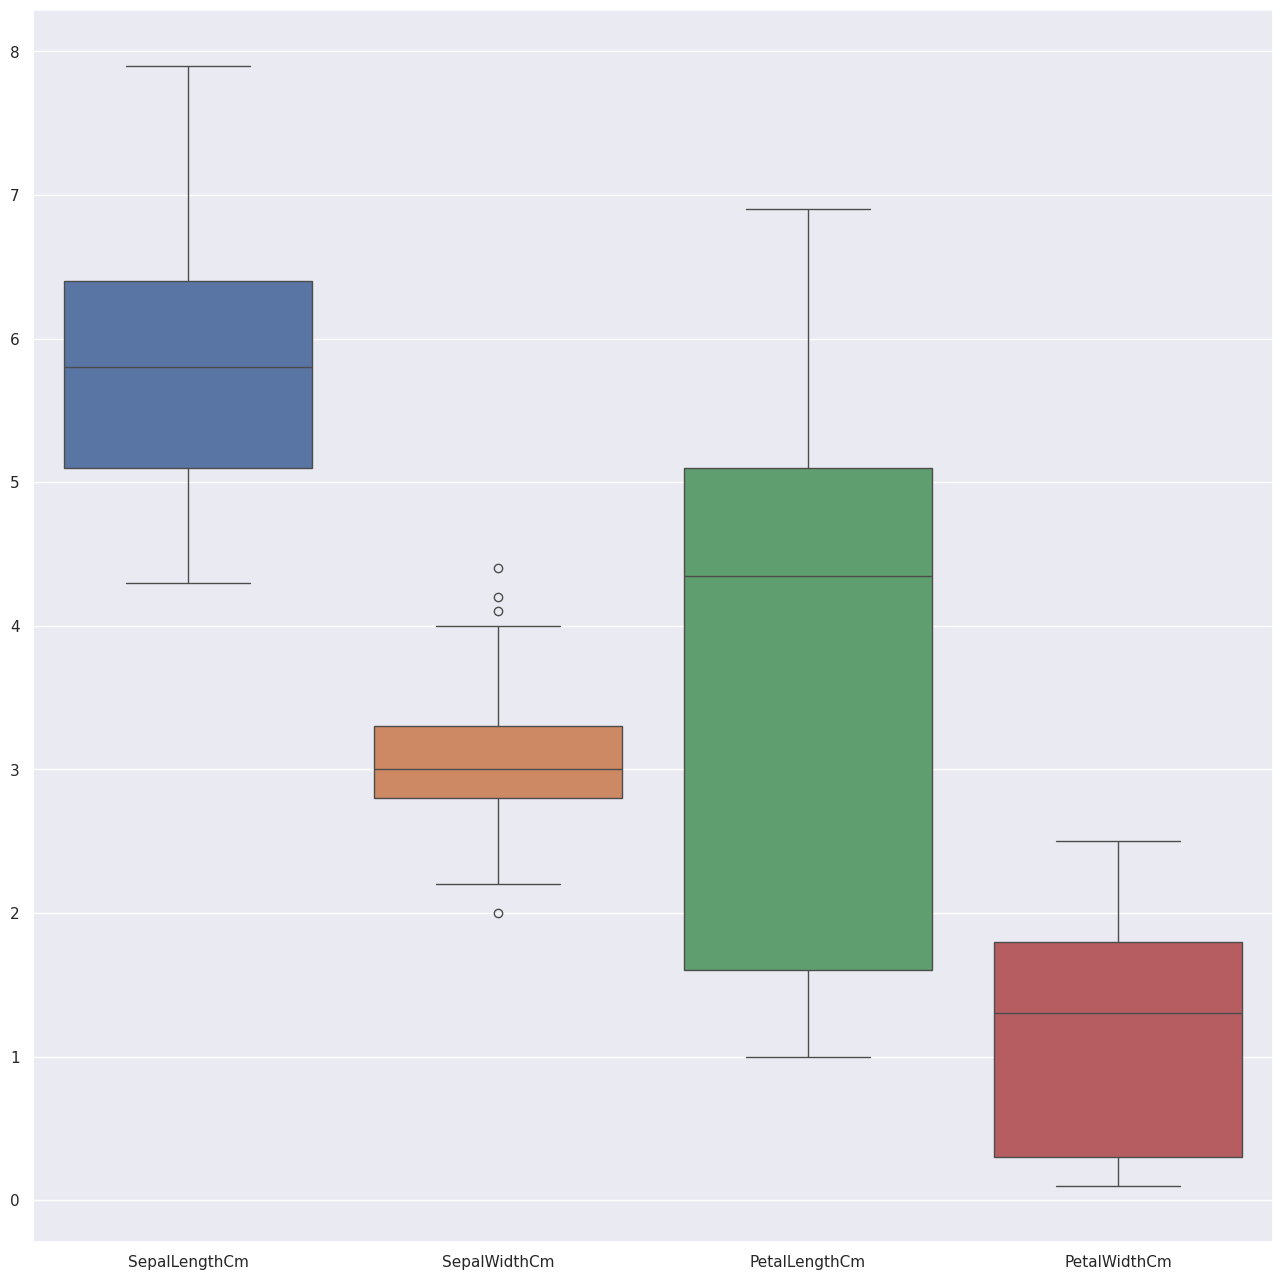

In [ ]:
sns.boxplot(data=temp_df)

In [ ]:
q1 = temp_df['SepalWidthCm'].quantile(0.25)
q3 = temp_df['SepalWidthCm'].quantile(0.75)
IQR = q3-q1
lower = q1-1.5*IQR
upper = q3+1.5*IQR

In [ ]:
temp_df = temp_df[(temp_df['SepalWidthCm'] >= lower) & (temp_df['SepalWidthCm'] <= upper)]

<Axes: >

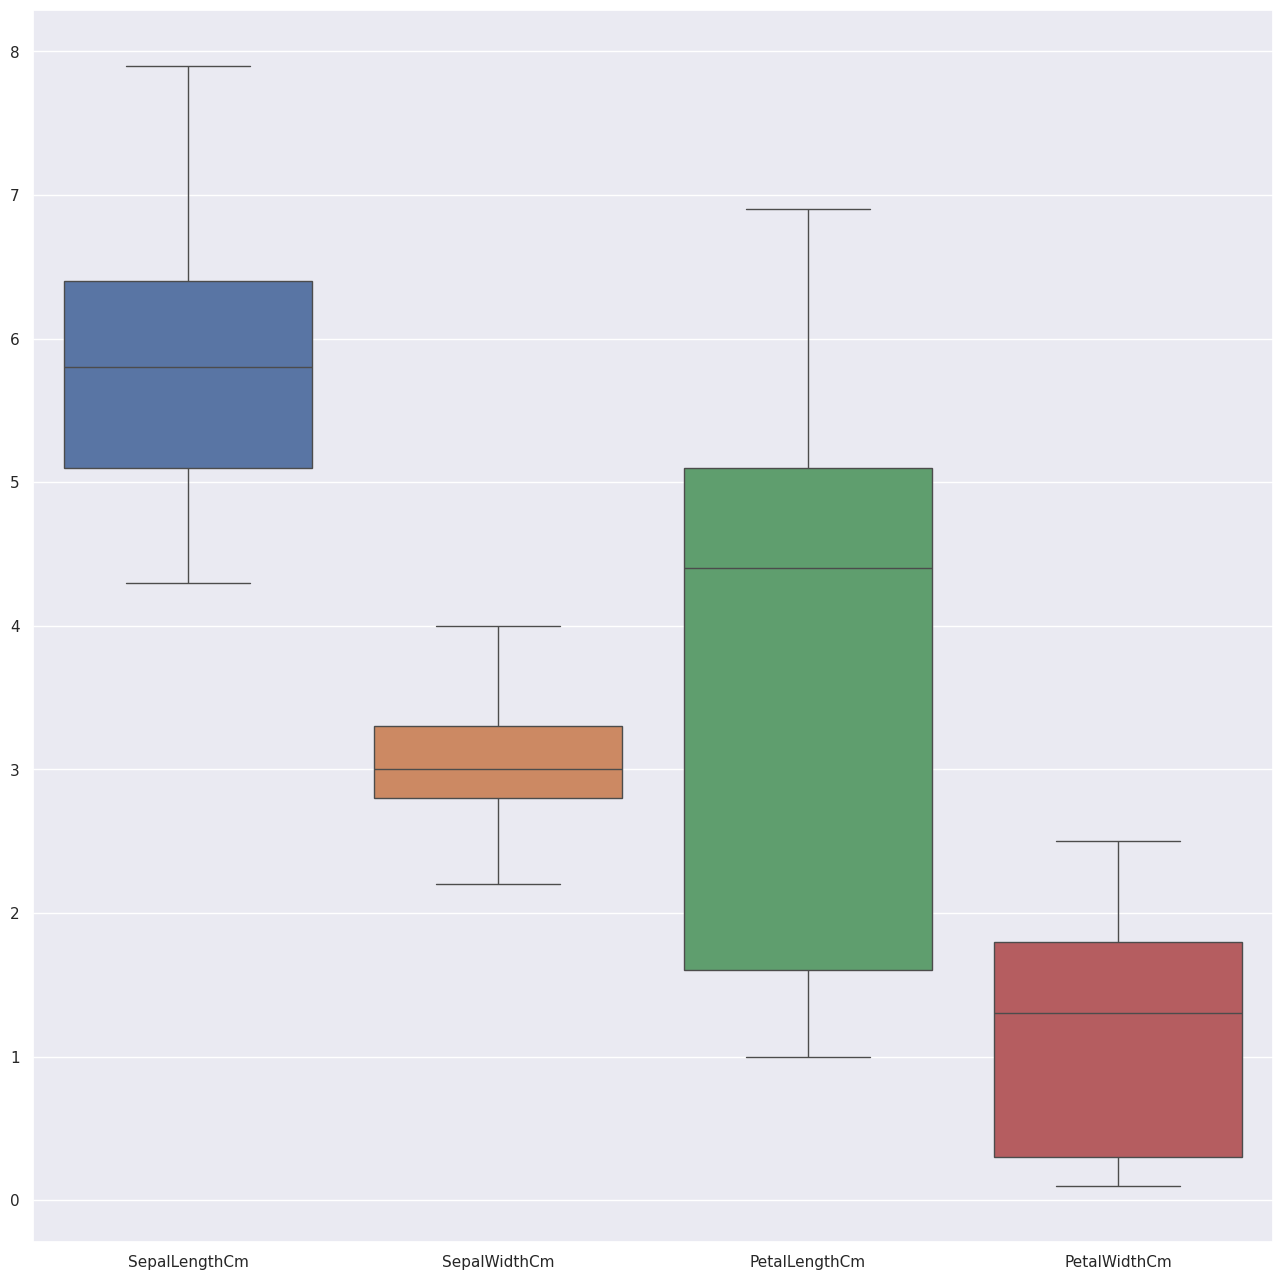

In [ ]:
sns.boxplot(data=temp_df)



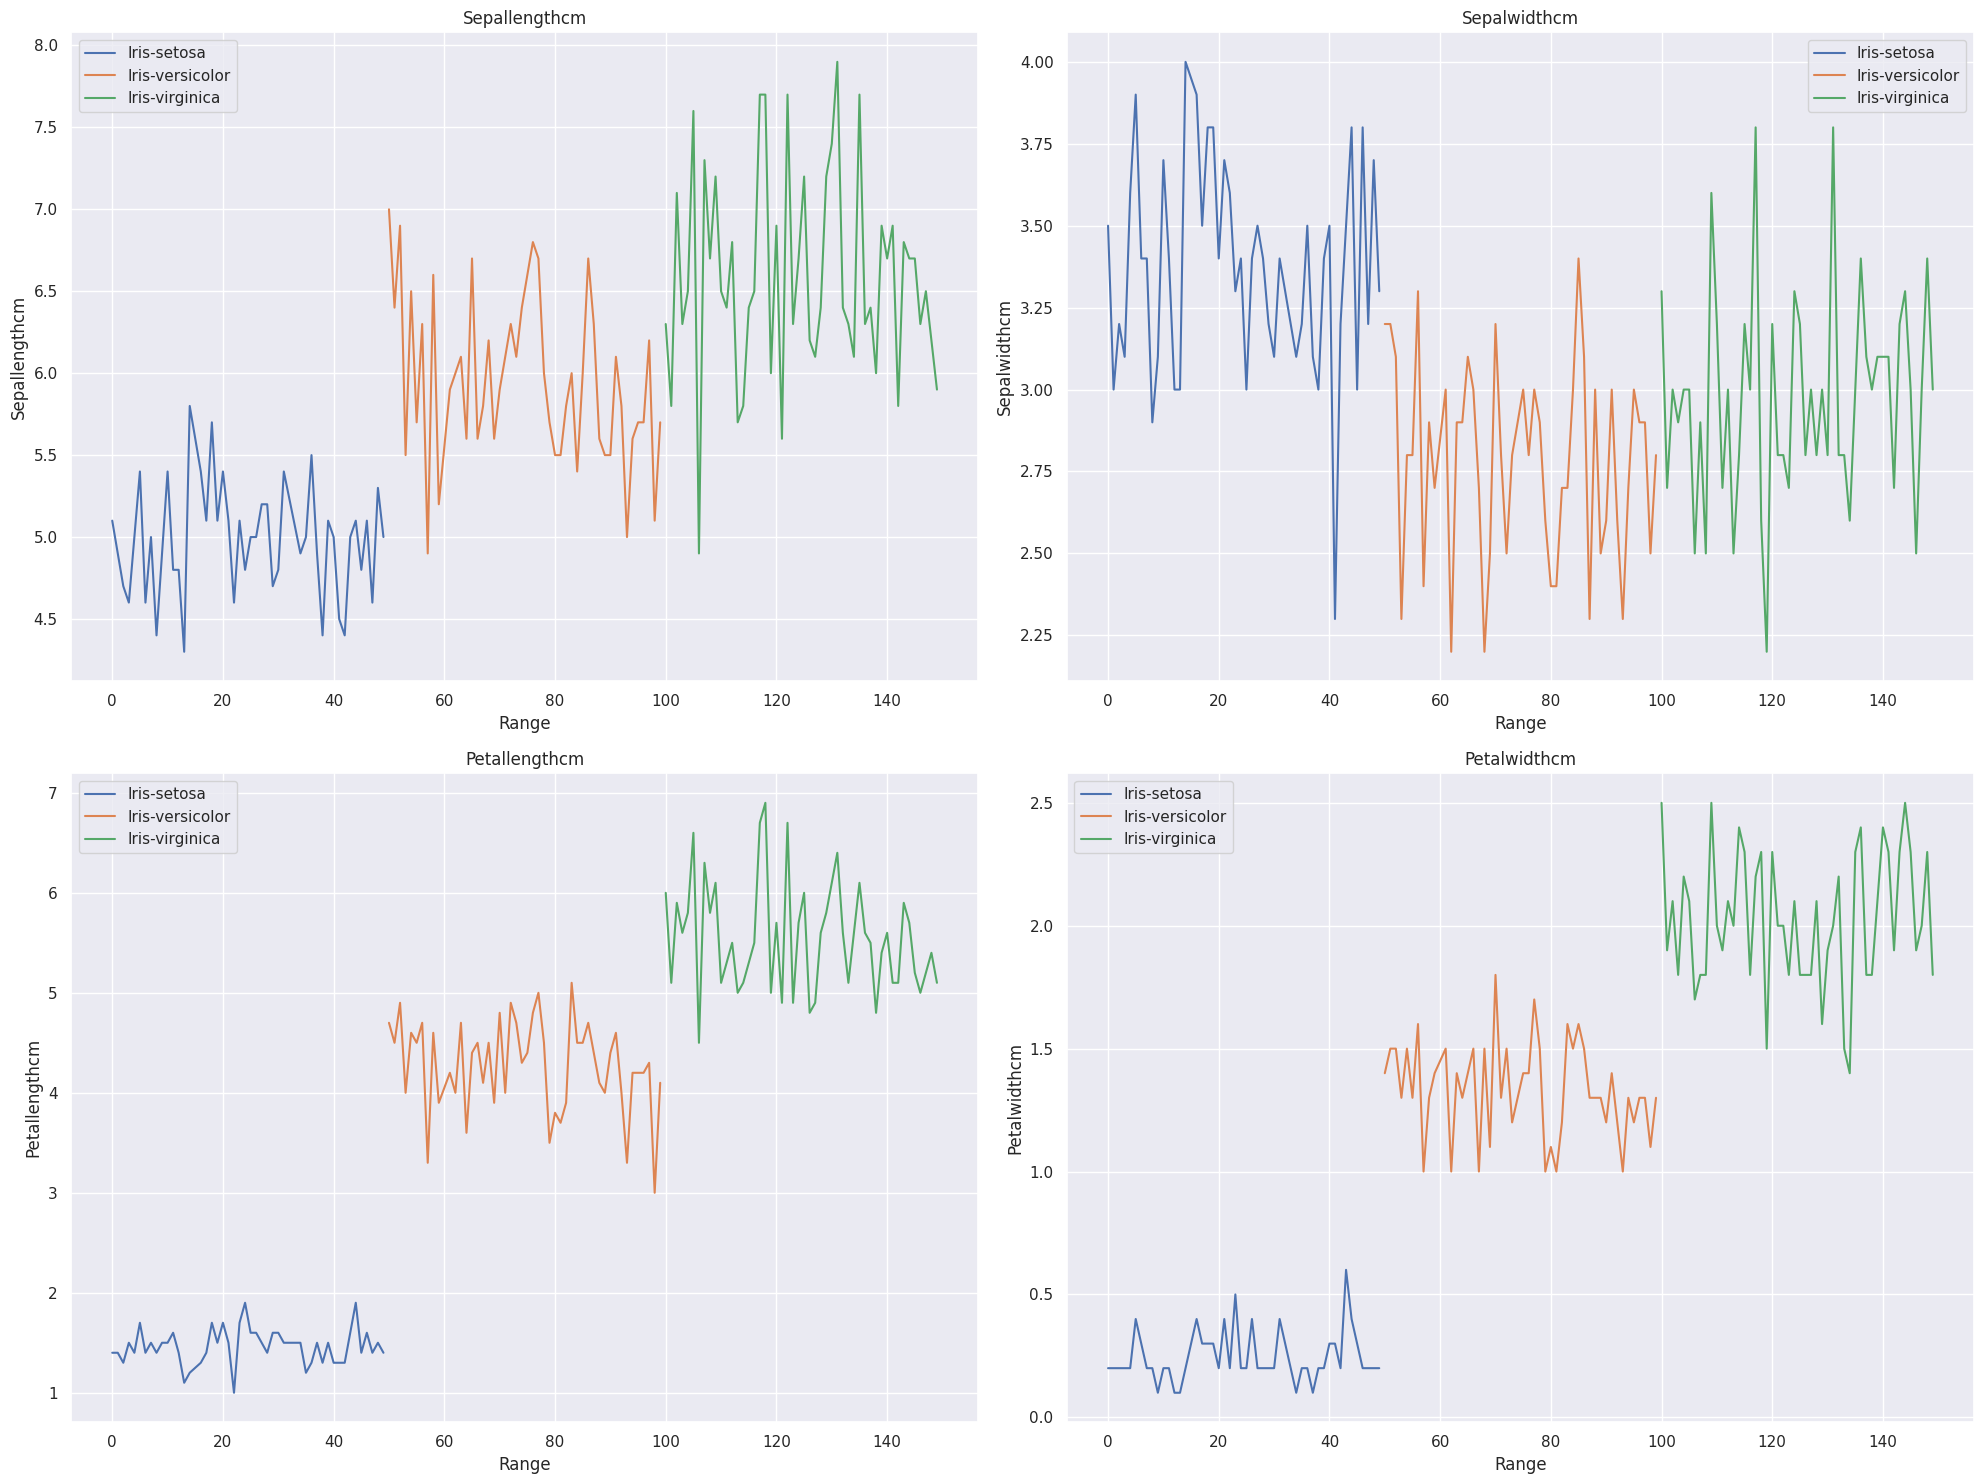

In [ ]:
columns = temp_df.columns[:-1]
num_rows = 2
num_cols = 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))
axes = axes.flatten()
for i, column in enumerate(columns):
    data = temp_df[column]
    for species in temp_df["Species"].unique():
        species_data = data[temp_df["Species"] == species]
        axes[i].plot(species_data, label=species)
    axes[i].set_title(column.capitalize())
    axes[i].set_xlabel("Range")
    axes[i].set_ylabel(column.capitalize())
    axes[i].legend()
plt.tight_layout()
plt.show()


In [ ]:

from sklearn.model_selection import train_test_split

In [ ]:
x = temp_df.drop(labels=['Species'],axis=1)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(temp_df['Species'])
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25,random_state=42,shuffle=True)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(109, 4)
(37, 4)
(109,)
(37,)


In [ ]:
result_df = pd.DataFrame()
result_df['Species_Test'] = le.inverse_transform(ytest)
result_df.head()

,Species_Test
0,Iris-setosa
1,Iris-virginica
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(max_iter=500)
logistic.fit(xtrain,ytrain)
print('Training Accuracy = {}'.format(accuracy_score(ytrain,logistic.predict(xtrain))))
y_predicted_logistic = logistic.predict(xtest)
print('Testing Accuracy = {}'.format(accuracy_score(ytest,y_predicted_logistic)))

Training Accuracy = 0.9724770642201835
Testing Accuracy = 0.9459459459459459


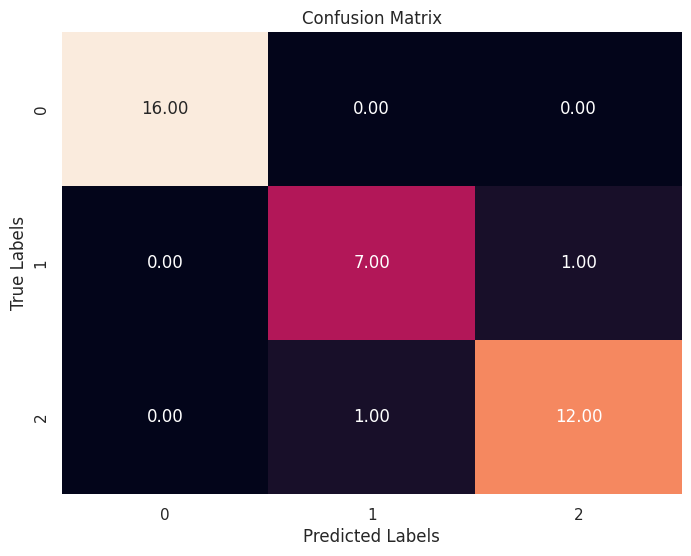

In [ ]:
cm = confusion_matrix(ytest, y_predicted_logistic)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt=".2f", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
print(classification_report(ytest,y_predicted_logistic))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.88      0.88      0.88         8
           2       0.92      0.92      0.92        13

    accuracy                           0.95        37
   macro avg       0.93      0.93      0.93        37
weighted avg       0.95      0.95      0.95        37



In [ ]:
result_df['Logistic_Test'] = le.inverse_transform(y_predicted_logistic)
result_df.sample(5)

,Species_Test,Logistic_Test
30,Iris-setosa,Iris-setosa
33,Iris-virginica,Iris-virginica
28,Iris-virginica,Iris-virginica
29,Iris-setosa,Iris-setosa
21,Iris-virginica,Iris-virginica


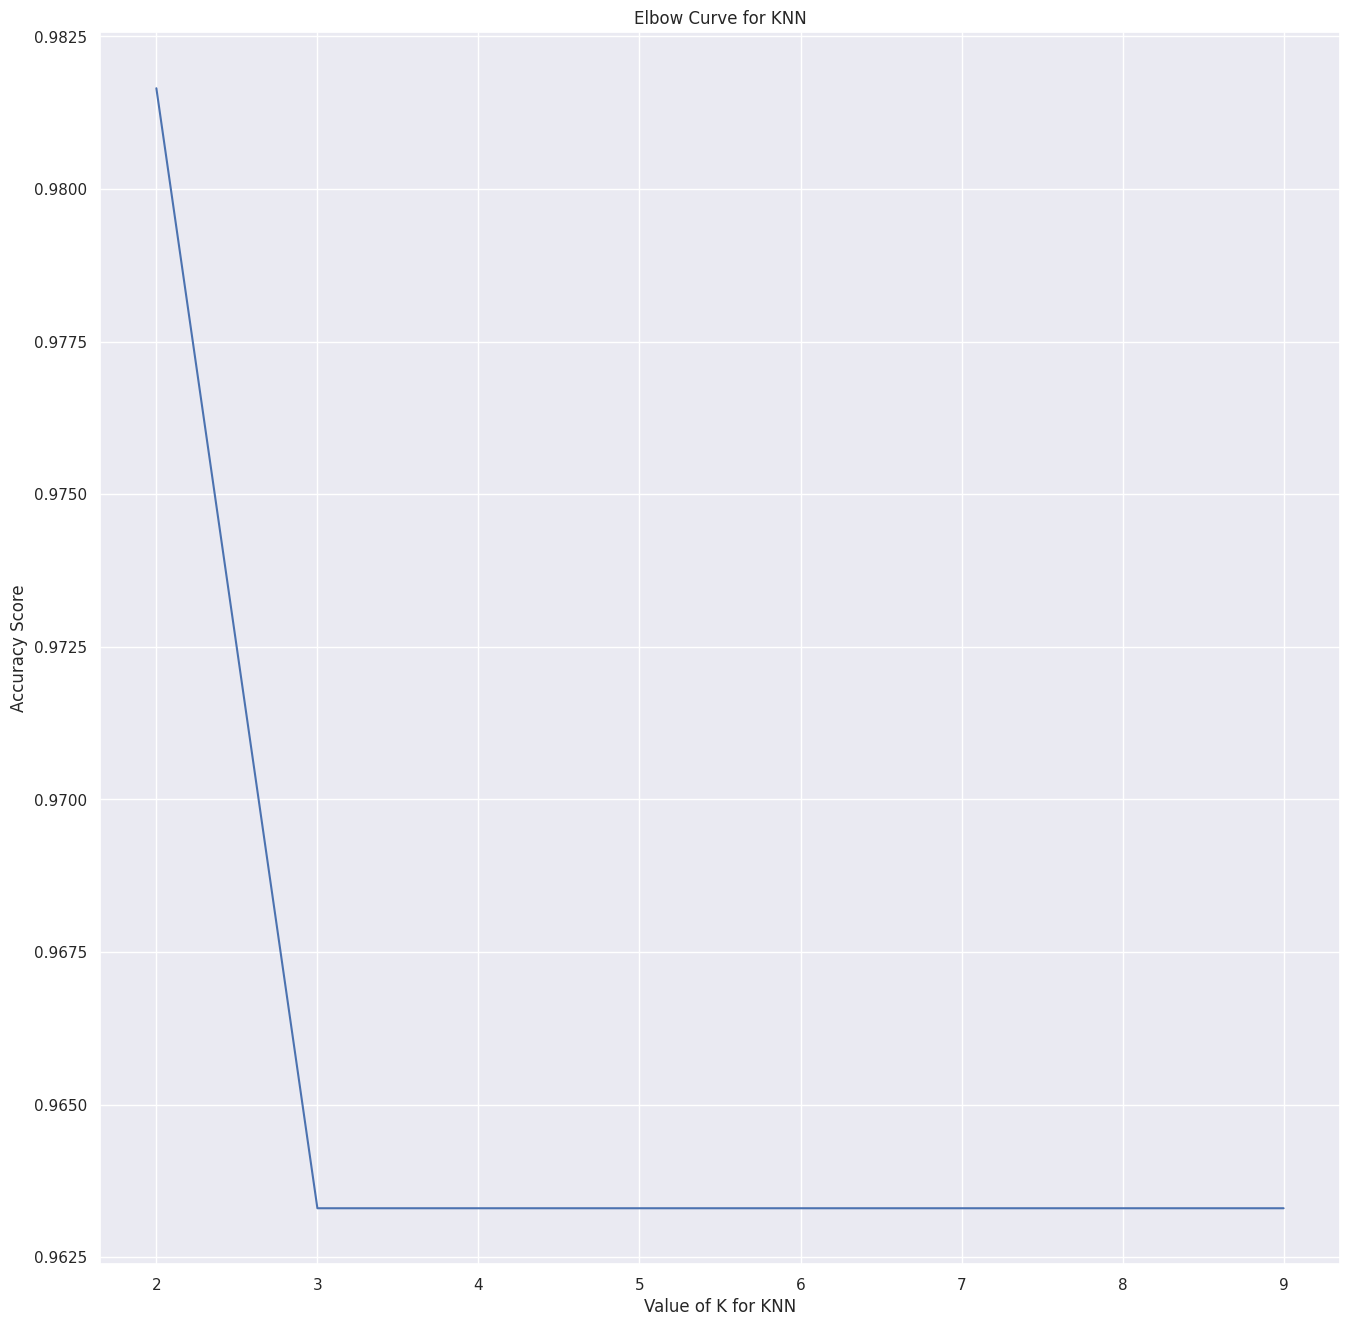

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
l = range(2, 10)
scores = []
for k in l:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(xtrain,ytrain)
    scores.append(knn.score(xtrain, ytrain))

plt.plot(l, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy Score')
plt.title('Elbow Curve for KNN')
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain,ytrain)
print('Training Accuracy = {}'.format(accuracy_score(ytrain,knn.predict(xtrain))))
y_predicted_knn = knn.predict(xtest)
print('Testing Accuracy = {}'.format(accuracy_score(ytest,y_predicted_knn)))

Training Accuracy = 0.963302752293578
Testing Accuracy = 0.9459459459459459


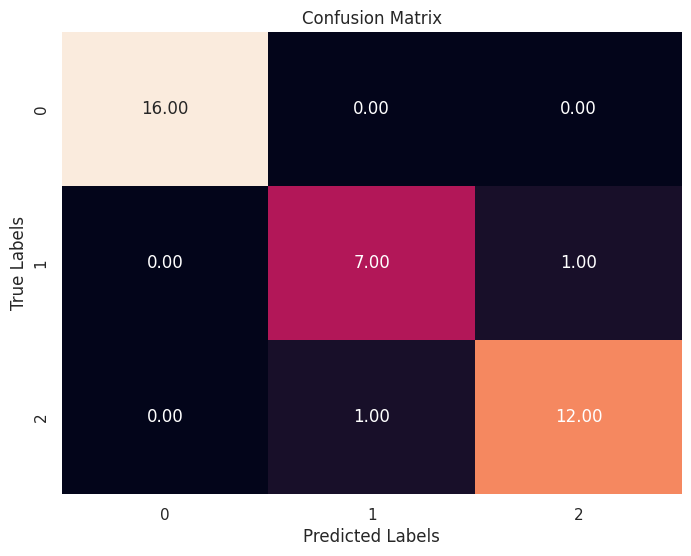

In [ ]:
cm2 = confusion_matrix(ytest,y_predicted_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm2, annot=True, fmt=".2f", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
print(classification_report(ytest,y_predicted_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.88      0.88      0.88         8
           2       0.92      0.92      0.92        13

    accuracy                           0.95        37
   macro avg       0.93      0.93      0.93        37
weighted avg       0.95      0.95      0.95        37



In [ ]:
result_df['KNN'] = le.inverse_transform(y_predicted_knn)
result_df.sample(5)

,Species_Test,Logistic_Test,KNN
3,Iris-setosa,Iris-setosa,Iris-setosa
36,Iris-virginica,Iris-virginica,Iris-virginica
6,Iris-setosa,Iris-setosa,Iris-setosa
31,Iris-setosa,Iris-setosa,Iris-setosa
18,Iris-setosa,Iris-setosa,Iris-setosa


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(xtrain,ytrain)
DecisionTreeClassifier(criterion='entropy')
print('Training Accuracy = {}'.format(accuracy_score(ytrain,dt.predict(xtrain))))
y_predicted_DT = dt.predict(xtest)
print('Testing Accuracy = {}'.format(accuracy_score(ytest,y_predicted_DT)))

Training Accuracy = 1.0
Testing Accuracy = 0.9459459459459459


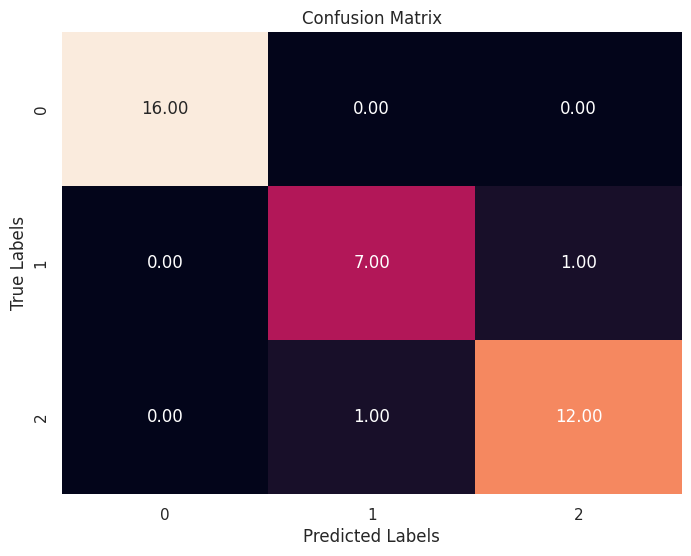

In [ ]:

cm3 = confusion_matrix(ytest,y_predicted_DT)
plt.figure(figsize=(8, 6))
sns.heatmap(cm3, annot=True, fmt=".2f", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
print(classification_report(ytest,y_predicted_DT))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.88      0.88      0.88         8
           2       0.92      0.92      0.92        13

    accuracy                           0.95        37
   macro avg       0.93      0.93      0.93        37
weighted avg       0.95      0.95      0.95        37



In [ ]:
result_df['DecisionTree'] = le.inverse_transform(y_predicted_DT)
result_df.sample(5)

,Species_Test,Logistic_Test,KNN,DecisionTree
26,Iris-versicolor,Iris-versicolor,Iris-versicolor,Iris-versicolor
10,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa
22,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa
24,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa
15,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa


In [ ]:
from sklearn.naive_bayes import GaussianNB
naive = GaussianNB()
naive.fit(xtrain, ytrain)
print('Training Accuracy = {}'.format(accuracy_score(ytrain,naive.predict(xtrain))))
y_predicted_naive = naive.predict(xtest)
print('Testing Accuracy = {}'.format(accuracy_score(ytest,y_predicted_naive)))

Training Accuracy = 0.963302752293578
Testing Accuracy = 0.9459459459459459


In [ ]:
result_df['Bayesian'] = le.inverse_transform(y_predicted_DT)
result_df.sample(5)

,Species_Test,Logistic_Test,KNN,DecisionTree,Bayesian
3,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa
10,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa
11,Iris-virginica,Iris-versicolor,Iris-versicolor,Iris-versicolor,Iris-versicolor
12,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica
27,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica


In [48]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(xtrain, ytrain)
RandomForestClassifier(random_state=42)
print('Training Accuracy = {}'.format(accuracy_score(ytrain,rf.predict(xtrain))))
y_predicted_rf = rf.predict(xtest)
print('Testing Accuracy = {}'.format(accuracy_score(ytest,y_predicted_rf)))

Training Accuracy = 1.0
Testing Accuracy = 0.9459459459459459


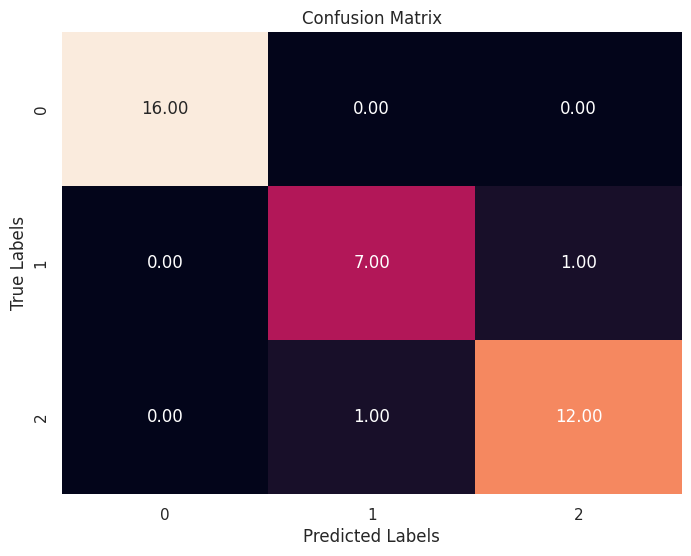

In [49]:
cm5 = confusion_matrix(ytest,y_predicted_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm5, annot=True, fmt=".2f", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [50]:
result_df['RandomForest'] = le.inverse_transform(y_predicted_rf)
result_df.sample(5)

,Species_Test,Logistic_Test,KNN,DecisionTree,Bayesian,RandomForest
25,Iris-versicolor,Iris-versicolor,Iris-versicolor,Iris-versicolor,Iris-versicolor,Iris-versicolor
30,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa
14,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica
24,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa
9,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa


In [54]:
from sklearn import svm
SVM = svm.SVC(kernel='rbf',probability=True)
SVM.fit(xtrain,ytrain)

SVC(probability=True)

In [55]:
print('Training Accuracy = {}'.format(accuracy_score(ytrain,SVM.predict(xtrain))))
y_predicted_svm = SVM.predict(xtest)
print('Testing Accuracy = {}'.format(accuracy_score(ytest,y_predicted_svm)))

Training Accuracy = 0.963302752293578
Testing Accuracy = 0.9459459459459459


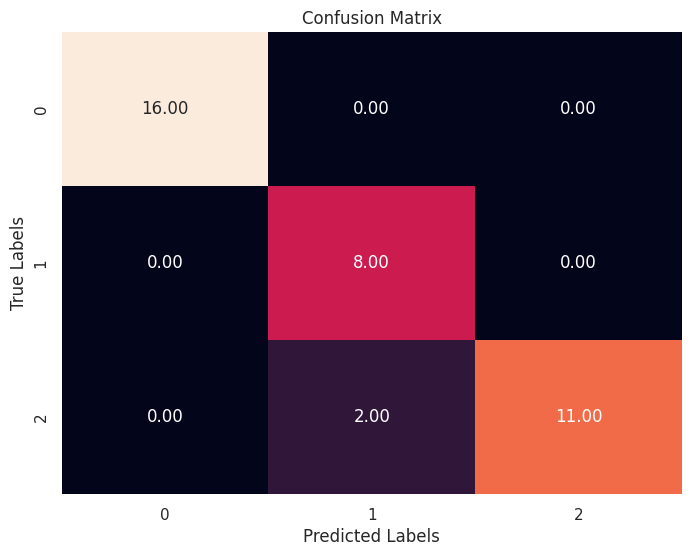

In [56]:
cm6 = confusion_matrix(ytest,y_predicted_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm6, annot=True, fmt=".2f", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [57]:
result_df['SVM'] = le.inverse_transform(y_predicted_svm)
result_df.sample(5)

,Species_Test,Logistic_Test,KNN,DecisionTree,Bayesian,RandomForest,SVM
33,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica
17,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica
14,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica
4,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa
12,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica


In [58]:
from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()
y_probs_1 = logistic.predict_proba(xtest)
y_probs_2 = knn.predict_proba(xtest)
y_probs_3 = dt.predict_proba(xtest)
y_probs_4 = naive.predict_proba(xtest)
y_probs_5 = rf.predict_proba(xtest)
y_probs_6 = SVM.predict_proba(xtest)
n_classes = len(np.unique(ytest))
n_classes

3

In [59]:
for i in range(n_classes):
    y_test_i = (ytest == i)
    y_score_1 = y_probs_1[:, i]
    y_score_2 = y_probs_2[:, i]
    y_score_3 = y_probs_3[:, i]
    y_score_4 = y_probs_4[:, i]
    y_score_5 = y_probs_5[:, i]
    y_score_6 = y_probs_6[:, i]
    fpr[1], tpr[1], _ = roc_curve(y_test_i, y_score_1)
    fpr[2], tpr[2], _ = roc_curve(y_test_i, y_score_2)
    fpr[3], tpr[3], _ = roc_curve(y_test_i, y_score_3)
    fpr[4], tpr[4], _ = roc_curve(y_test_i, y_score_4)
    fpr[5], tpr[5], _ = roc_curve(y_test_i, y_score_5)
    fpr[6], tpr[6], _ = roc_curve(y_test_i, y_score_5)
    roc_auc[1] = auc(fpr[1], tpr[1])
    roc_auc[2] = auc(fpr[2], tpr[2])
    roc_auc[3] = auc(fpr[3], tpr[3])
    roc_auc[4] = auc(fpr[4], tpr[4])
    roc_auc[5] = auc(fpr[5], tpr[5])
    roc_auc[6] = auc(fpr[6], tpr[6])

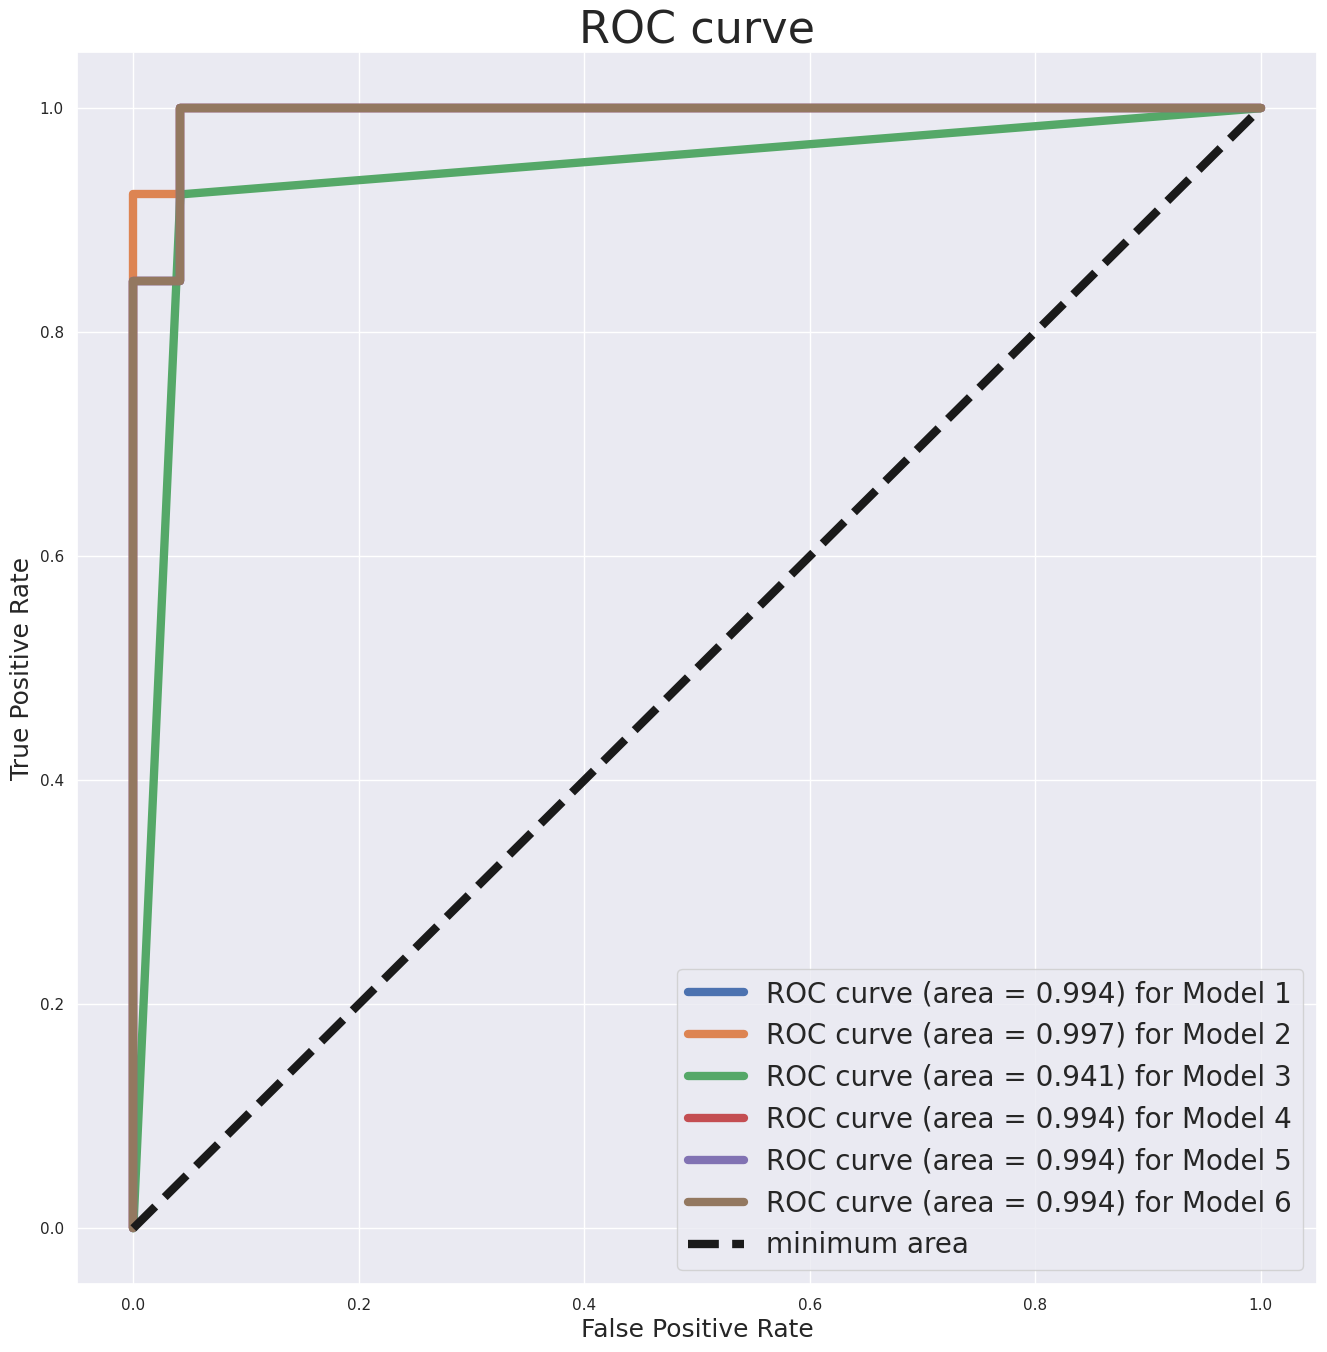

In [60]:
plt.figure()
lw = 6
for i in range(1, lw+1):
    plt.plot(fpr[i], tpr[i], lw=lw, label='ROC curve (area = {}) for Model {}'.format(round(roc_auc[i],3), i))
plt.plot([0, 1], [0, 1], linestyle='--', lw=lw, color='k', label='minimum area')
plt.xlabel('False Positive Rate',fontsize=18)
plt.ylabel('True Positive Rate',fontsize=18)
plt.title('ROC curve',fontsize=32)
plt.legend(loc="lower right",fontsize=20)
plt.show()